Exploratory Data Analysis (EDA) and Business Insights
1. Perform EDA on the provided dataset.
2. Derive at least 5 business insights from the EDA.
○ Write these insights in short point-wise sentences (maximum 100 words per insight).
Deliverables:
● A Jupyter Notebook/Python script containing your EDA code.
● A PDF report with business insights (maximum 500 words).


Customers.csv:
https://drive.google.com/file/d/1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE/view?usp=sharing

Products.csv :
https://drive.google.com/file/d/1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0/view?usp=sharing

Transactions.csv :
https://drive.google.com/file/d/1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF/view?usp=sharing

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the datasets
customers_path = "Customers.csv"
products_path = "Products.csv"
transactions_path = "Transactions.csv"

customers_df = pd.read_csv(customers_path)
products_df = pd.read_csv(products_path)
transactions_df = pd.read_csv(transactions_path)

# Convert date columns to datetime
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"], errors='coerce')
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"], errors='coerce')

<ipython-input-7-189b61eba837>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_region_count.index, y=customer_region_count.values, palette="viridis")


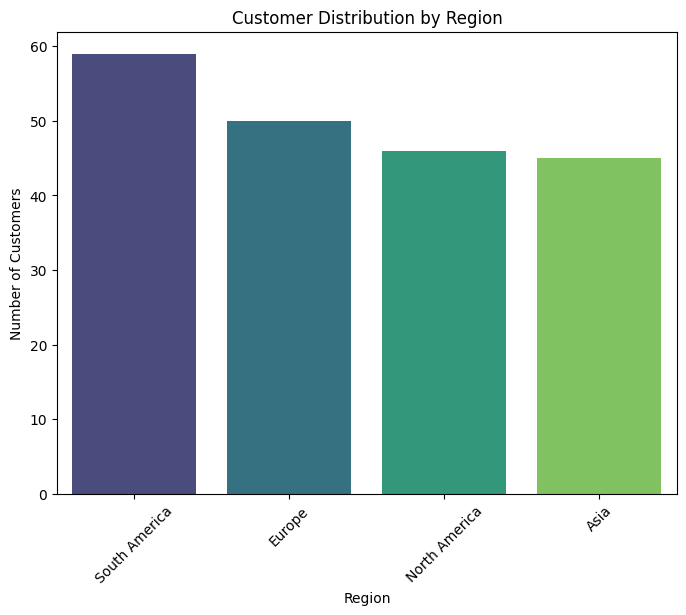

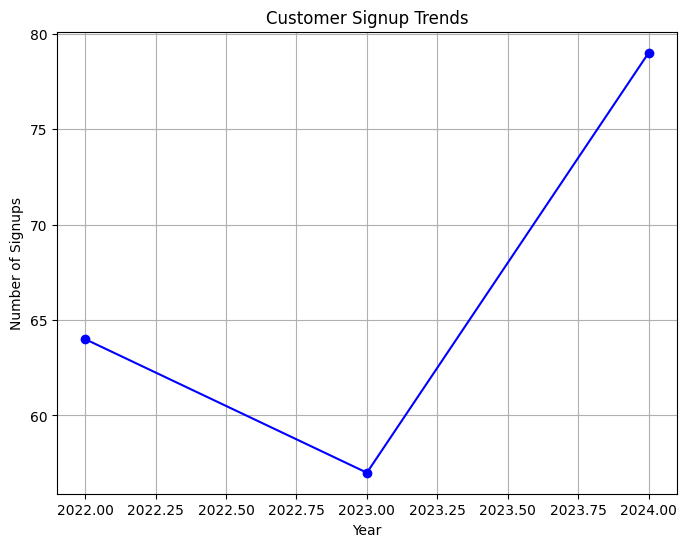

In [7]:
# --- EDA: Customer Analysis ---
# Customers by Region
customer_region_count = customers_df["Region"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_region_count.index, y=customer_region_count.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

# Signup Trends
customers_df["SignupYear"] = customers_df["SignupDate"].dt.year
signup_trends = customers_df["SignupYear"].value_counts().sort_index()
plt.figure(figsize=(8, 6))
signup_trends.plot(kind="line", marker='o', color="blue")
plt.title("Customer Signup Trends")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.grid(True)
plt.show()

<ipython-input-8-65f360f9d3da>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


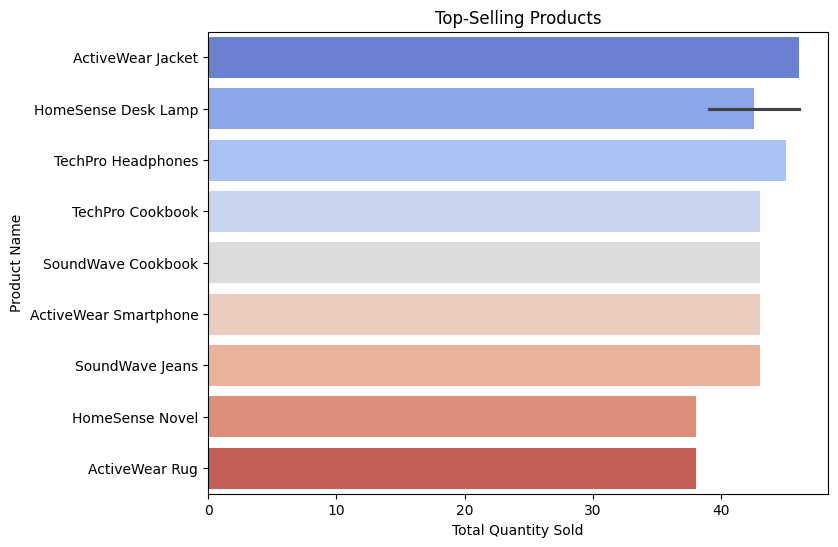

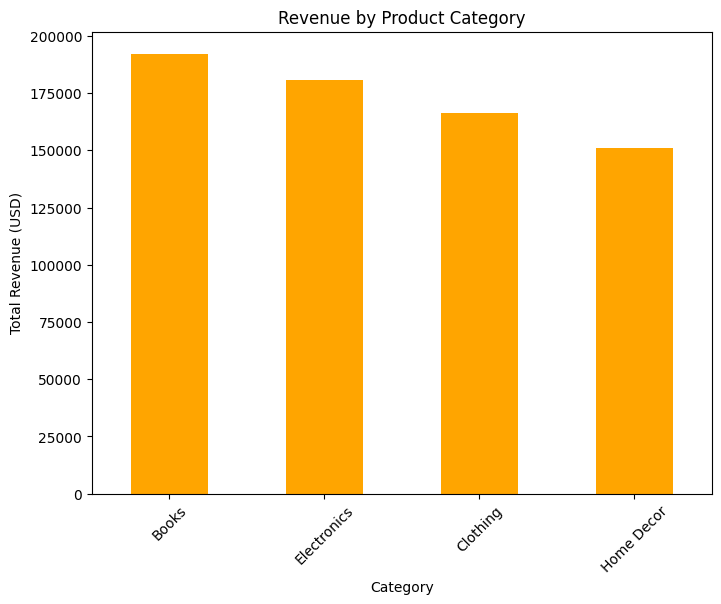

In [8]:
# --- EDA: Product Analysis ---
# Top Selling Products
top_selling_products = transactions_df.groupby("ProductID")["Quantity"].sum().sort_values(ascending=False).head(10)
top_selling_products_info = products_df[products_df["ProductID"].isin(top_selling_products.index)]
plt.figure(figsize=(8, 6))
sns.barplot(
    x=top_selling_products.values,
    y=top_selling_products_info["ProductName"],
    palette="coolwarm",
    orient="h",
)
plt.title("Top-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()

# Revenue by Category
transactions_with_products = transactions_df.merge(products_df, on="ProductID")
category_revenue = transactions_with_products.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
category_revenue.plot(kind="bar", color="orange")
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

<ipython-input-9-9c9f1618b9f2>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transactions_monthly = transactions_df.resample("M", on="TransactionDate").size()


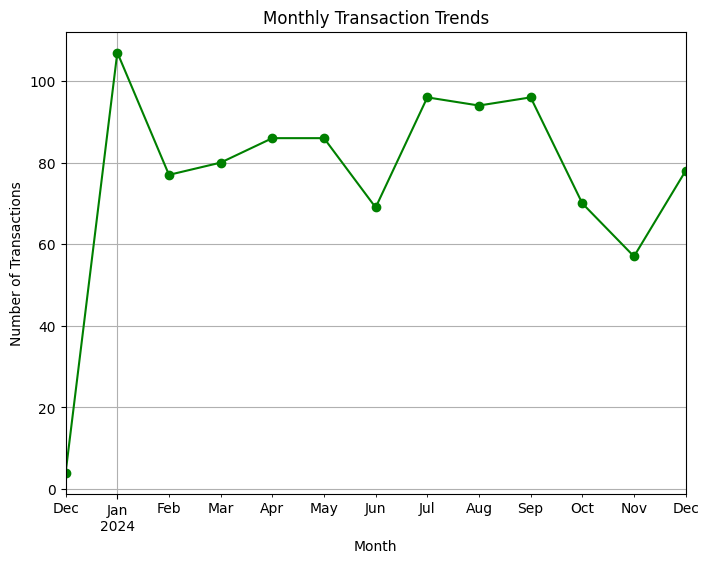

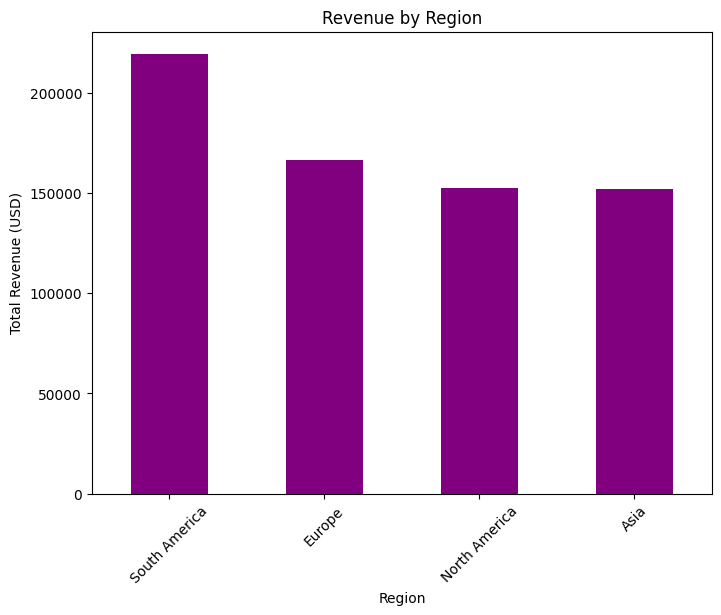

<ipython-input-9-9c9f1618b9f2>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="magma", orient="h")


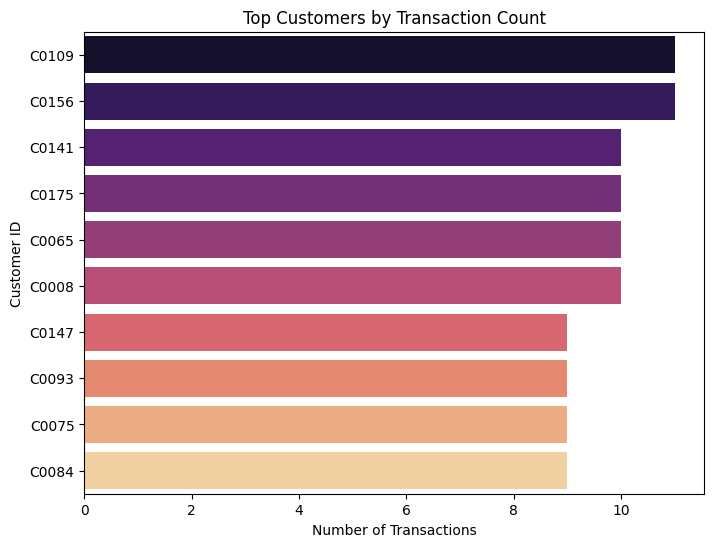

In [9]:
# --- EDA: Transaction Analysis ---
# Monthly Transactions
transactions_monthly = transactions_df.resample("M", on="TransactionDate").size()
plt.figure(figsize=(8, 6))
transactions_monthly.plot(kind="line", marker='o', color="green")
plt.title("Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()

# Revenue by Region
transactions_with_customers = transactions_df.merge(customers_df, on="CustomerID")
region_revenue = transactions_with_customers.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
region_revenue.plot(kind="bar", color="purple")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

# Top Customers by Transaction Count
top_customers = transactions_df["CustomerID"].value_counts().head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="magma", orient="h")
plt.title("Top Customers by Transaction Count")
plt.xlabel("Number of Transactions")
plt.ylabel("Customer ID")
plt.show()